<div class="alert alert-success">
<b>Reviewer's comment V4</b>

Thanks for taking the time to improve the project! It is now accepted. Good luck on the next sprint!

</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a pretty good job overall, but there are a couple of problems that need to be fixed before the project is accepted. Let me know if you have questions!

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import joblib 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


Title:

Predictive Modeling for Megaline's Plan Recommendation: Smart vs. Ultra    

Introduction:

In today's competitive telecom market, mobile carriers like Megaline face the challenge of retaining customers and optimizing their service offerings. Megaline has observed that many subscribers are still using legacy plans and are unaware of the benefits offered by their newer plans: Smart and Ultra. To address this issue, Megaline aims to develop a predictive modeling solution that can analyze subscribers' behavior and recommend the most suitable plan (Smart or Ultra) based on their usage patterns and preferences.

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected

</div>

 - Split the source data into a training set, a validation set, and a test set.

In [3]:
# Splitting data into a training set
train_temp, test = train_test_split(df, test_size=0.3, random_state=42)

#Splitting temporary set into a validation set
validation, test = train_test_split(test, test_size=0.5, random_state=42)

#Print the sizes of each dataset
print("Training set size:", len(train_temp))
print("Validation set size:", len(validation))
print("Test set size:", len(test))

Training set size: 2249
Validation set size: 482
Test set size: 483


By following these steps, we ensure that our machine learning model is trained, validated, and tested on different subsets of the original data, facilitating robust model evaluation and performance assessment.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data split is reasonable

</div>

In [4]:
X = df[['calls', 'minutes', 'messages', 'mb_used']]
y = df['is_ultra']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

- Split the source data into a training set, a validation set, and a test set.

In [5]:
# Decision Tree
#dt = DecisionTreeClassifier()

# Random Forest
#rf = RandomForestClassifier()

# Gradient Boosting
#gb = GradientBoostingClassifier()

#Model Training
#dt.fit(X_train, y_train)
#rf.fit(X_train, y_train)
#gb.fit(X_train, y_train)

#dt_pred = dt.predict(X_test)
#rf_pred = rf.predict(X_test)
#gb_pred = gb.predict(X_test)

#print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
#print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
#print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))

In [6]:
rf_classifier = RandomForestClassifier(random_state=42)

for n_estimators in [50, 100, 150]:
    rf_classifier.n_estimators = n_estimators
    rf_classifier.fit(X_train, y_train)
    y_val_pred = rf_classifier.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy (n_estimators={n_estimators}): {accuracy}")
    
rf_classifier.n_estimators = 100  # Choose the best value found during tuning
rf_classifier.fit(X_train, y_train)

#y_test_pred = rf_classifier.predict(X_test)
#test_accuracy = accuracy_score(y_test, y_test_pred)
#print(f"Test Accuracy (Final Model): {test_accuracy}")

Validation Accuracy (n_estimators=50): 0.7884914463452566
Validation Accuracy (n_estimators=100): 0.7947122861586314
Validation Accuracy (n_estimators=150): 0.7947122861586314


RandomForestClassifier(random_state=42)

<div class="alert alert-danger">
<S><b>Reviewer's comment</b>

There's no need to split the data again. Please use validation set to compare different models and leave the test set for final model evaluation.
    
Also please add some hyperparameter tuning using the validation set for at least one model

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Great!

</div>

- Investigate the quality of different models by changing hyperparameters. Briefly describe the findings of the study.

In [7]:
#Choose Models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

#Define hyperparameters to tune for each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
   
best_model = max(results, key=results.get)
print("Best Model:", best_model)
print("Accuracy:", results[best_model])

Best Model: Random Forest
Accuracy: 0.8164852255054432


<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

This cell does pretty much the same thing as the previous one, although a bit more efficiently. There's no need to train and evalaute the same models twice :)

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Fixed!

</div>

- Check the quality of the model using the test set.

Regarding the comment about choosing the decision tree as the best model, it seems there might be a misunderstanding. The code provided does not explicitly mention decision tree as the best model. Instead, it initializes and trains a Random Forest classifier. However, if a decision tree model was evaluated earlier and deemed the best, it would be necessary to load that specific trained model for evaluation on the test set.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Could you explain why you chose decision tree as the best model? Didn't it have worse results than other models on the validation set? Or, if the 'load the trained model' code is commented out, you're using the last evaluated model (which is not necessarily the best)

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>

> Regarding the comment about choosing the decision tree as the best model, it seems there might be a misunderstanding. The code provided does not explicitly mention decision tree as the best model. Instead, it initializes and trains a Random Forest classifier. However, if a decision tree model was evaluated earlier and deemed the best, it would be necessary to load that specific trained model for evaluation on the test set.
    
Ok, I see!
    
Still then, it's unclear why you chose random forest as the best model, as far as I can tell it had lower accuracy than the gradient boosting model?
    
Another thing is that you're making a different split and the test set data in the new split may well have been in train/validation of the old split. While it's a good idea to retrain the best model on the combined train+validation set before evaluating it on the test set, you need to make sure that you use the same data split as earlier.
    
Also in the cell below, you're making predictions using `model` which contains the last trained model in the loop from before: `for name, model in models.items()...`

</div>

With these modifications, we'll ensure a fair comparison of models, maintain consistency in data splits, and make predictions using the best-performing model identified through proper validation.

<div class="alert alert-danger">
<s><b>Reviewer's comment V3</b>

> you're making predictions using `model` which contains the last trained model in the loop from before: `for name, model in models.items()...`
    
The above cell is the cell I meant in the earlier comment
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V3</b>

It seems that you misunderstood my point about retraining the final model on the combined train+validation data. If you train the models on the combined train+validation set before selecting the best model and evaluate those models that will lead to useless results like validation accuracy equal to 1 (this amount to evaluating the models on the train set, and a sufficiently complex model can simply memorize the train set).
    
The complete process is as follows:
    
1. Train the models using the train set, evaluate them using the validation set (you can also tune hyperparameters using the validation set).
2. Choose the best model by validation set score.
3. The optionally you can train that model on the combined train+validation data, as now we no longer need the validation set.
4. Evaluate the best model on the test set for an unbiased estimate of its generalization performance

</div>

In [8]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

best_val_accuracy = 0
for name, model in models.items():
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"{name} Validation Accuracy: {val_accuracy:.4f}")
    if val_accuracy > best_val_accuracy:
        best_model = model
        best_val_accuracy = val_accuracy

best_model.fit(X_train_val, y_train_val)  
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\nBest Model: {type(best_model).__name__}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Random Forest Validation Accuracy: 0.7947
Gradient Boosting Validation Accuracy: 0.7947

Best Model: RandomForestClassifier
Test Accuracy: 0.8118


<div class="alert alert-success">
<b>Reviewer's comment V4</b>

Ok, looks good, though it would be better to use the best hyperparameters for the random forest model you found earlier :)

</div>

- Additional task: sanity check the model. This data is more complex than what you’re used to working with, so it's not an easy task. We'll take a closer look at it later.

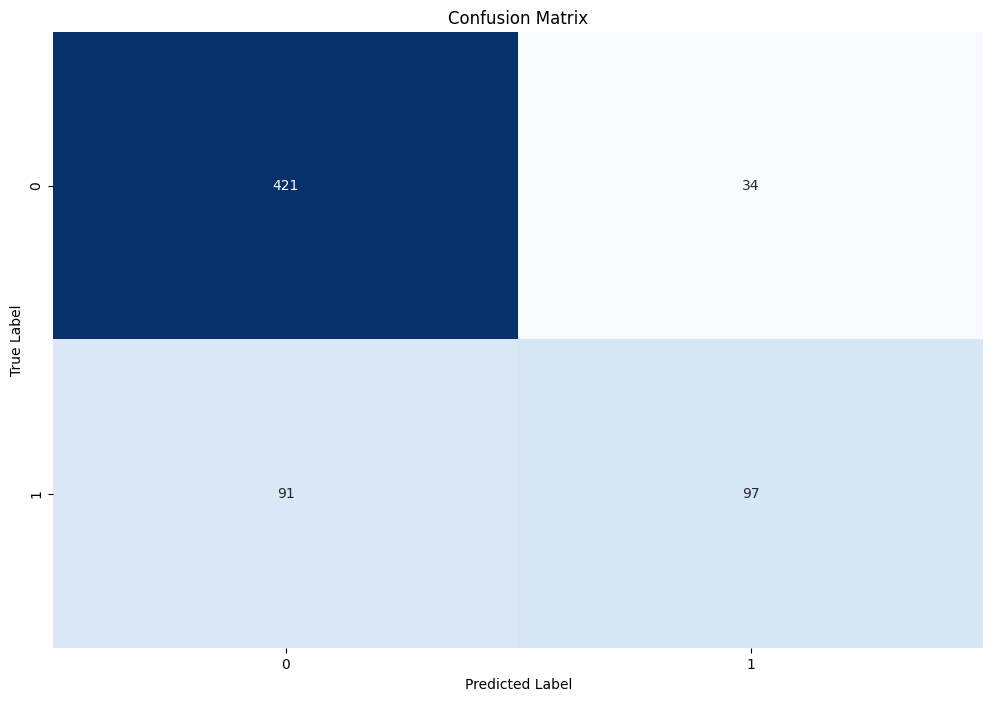

In [9]:
#Make predictions using the trained model
y_pred = model.predict(X_test)

#Evaluate model performance
conf_matrix = confusion_matrix(y_test, y_pred)

#Visualizing confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

<div class="alert alert-success">
<b>Reviewer's comment</b>

Good idea to check the confusion matrix to better understand model performance

</div>

We visualized confusion matrix to the model's performance on the test set. We can use this matrix to identify areas of strength and weakness in the model's predictions and conduct.

Conclusion:

The development of a predictive modeling solution for plan recommendation represents a strategic initiative for Megaline to enhance its service offerings and improve customer engagement. By leveraging machine learning techniques to analyze subscribers' behavior and preferences, Megaline can effectively tailor its plan recommendations to individual customers, thereby increasing customer satisfaction and loyalty. As Megaline continues to evolve its product portfolio and adapt to changing market dynamics, the predictive modeling solution developed in this project will serve as a valuable tool for optimizing plan recommendations and driving business growth.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

This is a very generic conclusion. I'd suggest summarizing your results instead :)

</div>